In [1]:
import numpy as np
import pandas as pd


In [2]:
df= pd.read_csv("car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
cat_features= df.select_dtypes(include=["O"])

In [7]:
cat_features.columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [8]:
num_features= df.select_dtypes(exclude=["O"])

In [9]:
num_features

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0
...,...,...,...,...,...
296,2016,9.50,11.60,33988,0
297,2015,4.00,5.90,60000,0
298,2009,3.35,11.00,87934,0
299,2017,11.50,12.50,9000,0


In [10]:
df.isnull().sum()    #No misssing Values found

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
df.isnull().sum().mean()

0.0

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [13]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [14]:
final_df=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [15]:
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
final_df['CurrentYear']=2021


In [17]:
final_df["no_year"]= final_df["CurrentYear"] - final_df["Year"]

In [18]:
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CurrentYear,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [19]:
final_df.drop(["Year", "CurrentYear"], axis=1, inplace=True)

In [20]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [21]:
final_df= pd.get_dummies(final_df, drop_first=True)

In [22]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [23]:
final_df.shape

(301, 9)

In [24]:
cormat=final_df.corr()
cormat

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

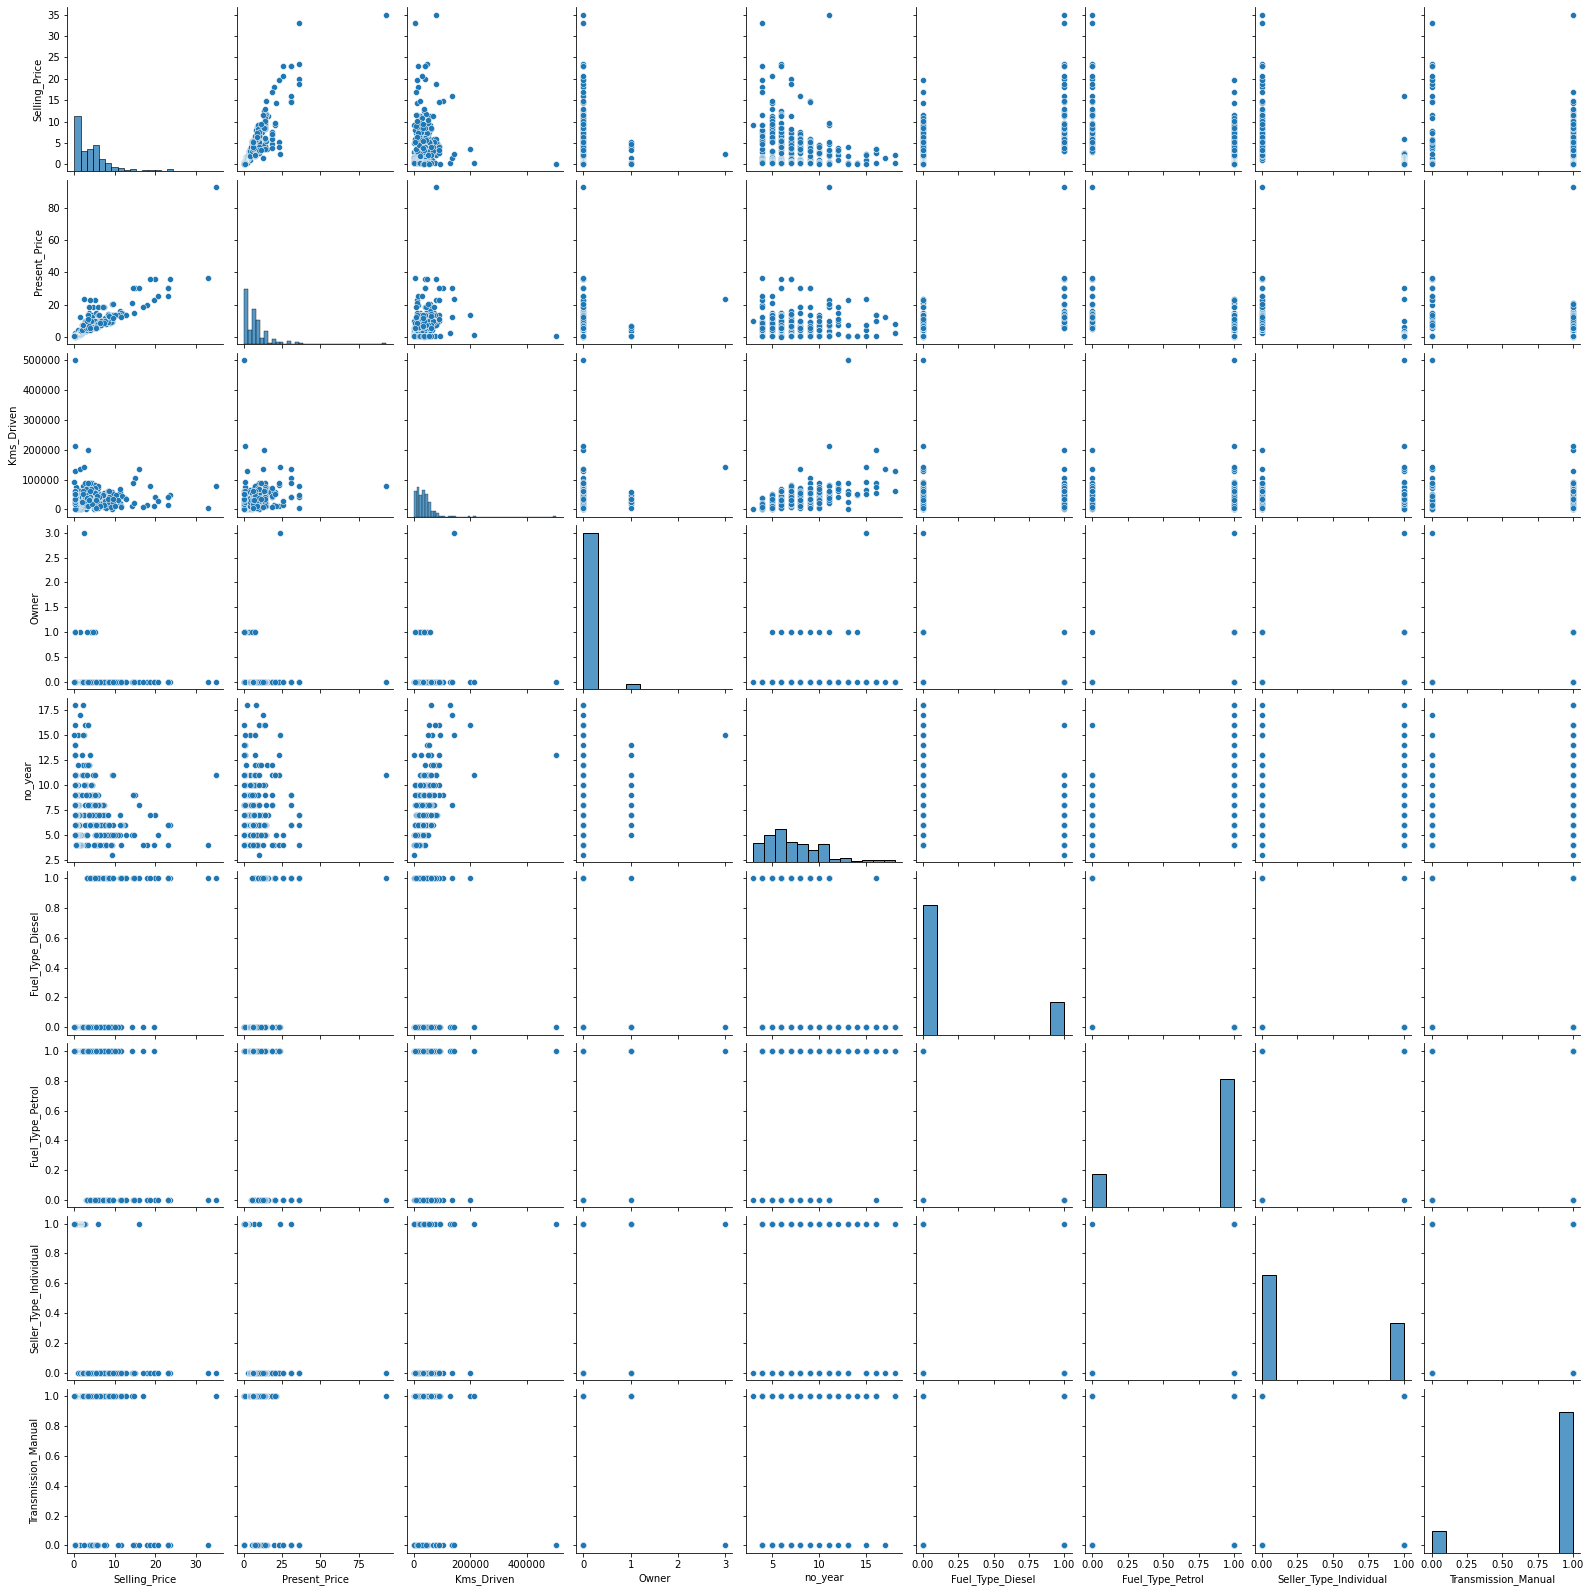

In [26]:
sns.pairplot(final_df)

<AxesSubplot:>

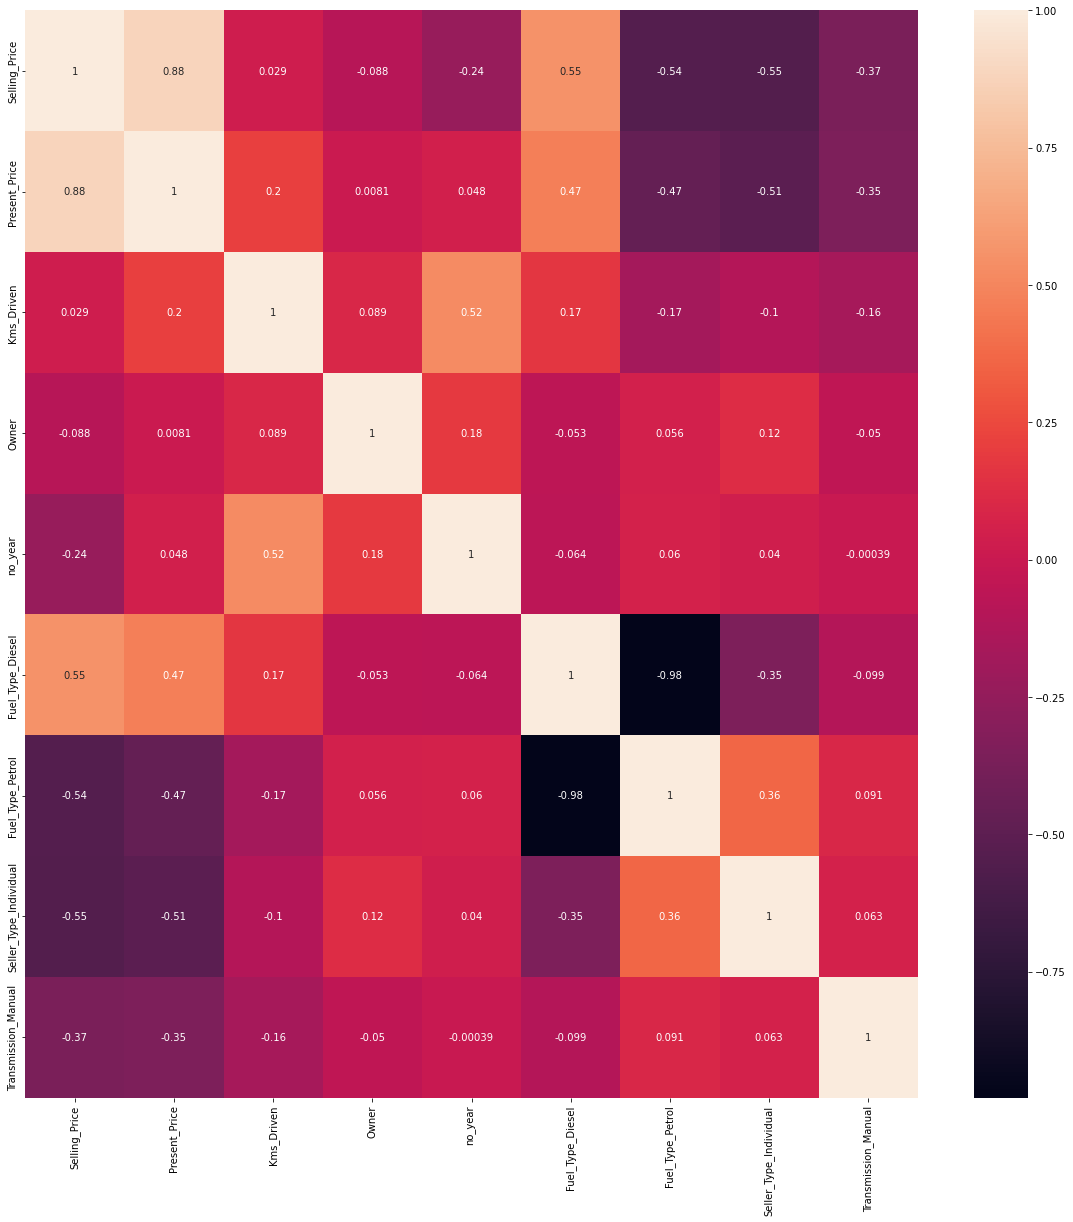

In [27]:
figure=plt.figure(figsize=(20,20))


sns.heatmap(cormat, annot=True)

In [28]:
X= final_df.drop(["Selling_Price"],axis=1)
y=final_df["Selling_Price"]

In [29]:
X.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [30]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [31]:
3#Feature Importances but do not remove features now as too less variables here
from sklearn.ensemble import ExtraTreesRegressor

In [32]:
model= ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [33]:
model.feature_importances_

array([0.37865258, 0.04194033, 0.00081685, 0.07218716, 0.23091028,
       0.00714224, 0.12394345, 0.1444071 ])

In [34]:
top_features= pd.Series(model.feature_importances_, X.columns)

<AxesSubplot:>

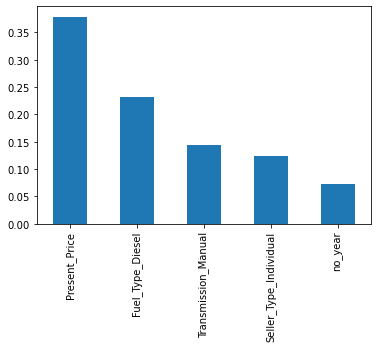

In [35]:
top_features.nlargest(5).plot(kind="bar")

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
rf= RandomForestRegressor()

###Hyperparameter Tuning

In [40]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [41]:
from sklearn.model_selection import RandomizedSearchCV
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf' : min_samples_leaf}

In [42]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [43]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [44]:
pred= rf_random.predict(X_test)

In [45]:
pred

array([ 7.02793129,  0.51351975,  4.94645964,  8.33778619, 12.33292699,
        5.27087402,  3.38021502,  0.42958594,  3.92726765,  5.01444302,
        2.83816819,  0.65564948,  5.09565418,  7.23809268,  7.45730056,
       12.44102204,  6.99860461,  4.18136188,  0.47963804,  1.3070927 ,
        3.26557543,  5.19545403,  5.42720288, 10.39526871,  0.23728647,
        0.68688788,  0.33201786,  0.68017611,  0.4996561 ,  4.97354091,
        2.89921571,  5.84174317,  0.51743148,  7.13406482,  3.31566692,
        1.15305212,  5.73801927,  5.48622924,  0.25116619,  7.52908749,
        7.57803199, 22.04019038,  5.08860415,  4.54647702,  5.57817614,
       10.35995227,  0.25644784,  0.75656029,  5.42487027,  6.78870918,
        6.65229073,  2.95672431,  5.3622704 , 22.04019038,  1.15305212,
        1.15132563,  0.41366644,  2.75062044,  3.66618577,  2.5582864 ,
        4.60953542])

In [46]:
error= y_test- pred
error

223    1.222069
150   -0.013520
226    0.303540
296    1.162214
52     5.667073
         ...   
137    0.236334
227   -0.200620
26     0.483814
106   -1.208286
92    -1.099535
Name: Selling_Price, Length: 61, dtype: float64

<AxesSubplot:ylabel='Frequency'>

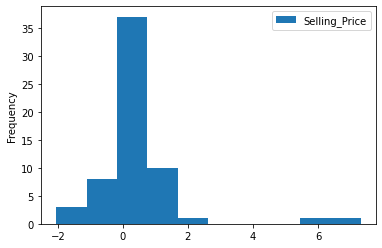

In [47]:
pd.DataFrame(error).plot(kind='hist')

In [48]:
pd.Series(error).var()

1.8399920616026604

In [49]:
pd.Series(error).mean()

0.41025402870149186

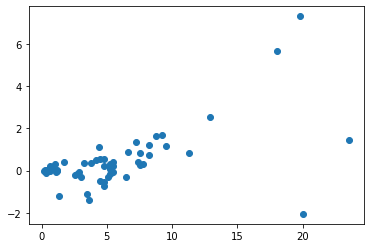

In [50]:
error=pd.DataFrame(error)
plt.scatter(y_test,error)

In [51]:
import pickle

In [56]:
model = open('random_forest_regressor_model.pkl','wb')
pickle.dump(rf_random, model)

In [57]:
model=open('random_forest_regressor_model.pkl','rb')
forest=pickle.load(model)


In [58]:
y_pred= forest.predict(X_test)
y_pred

array([ 7.02793129,  0.51351975,  4.94645964,  8.33778619, 12.33292699,
        5.27087402,  3.38021502,  0.42958594,  3.92726765,  5.01444302,
        2.83816819,  0.65564948,  5.09565418,  7.23809268,  7.45730056,
       12.44102204,  6.99860461,  4.18136188,  0.47963804,  1.3070927 ,
        3.26557543,  5.19545403,  5.42720288, 10.39526871,  0.23728647,
        0.68688788,  0.33201786,  0.68017611,  0.4996561 ,  4.97354091,
        2.89921571,  5.84174317,  0.51743148,  7.13406482,  3.31566692,
        1.15305212,  5.73801927,  5.48622924,  0.25116619,  7.52908749,
        7.57803199, 22.04019038,  5.08860415,  4.54647702,  5.57817614,
       10.35995227,  0.25644784,  0.75656029,  5.42487027,  6.78870918,
        6.65229073,  2.95672431,  5.3622704 , 22.04019038,  1.15305212,
        1.15132563,  0.41366644,  2.75062044,  3.66618577,  2.5582864 ,
        4.60953542])

In [59]:
from sklearn.metrics import r2_score
r2= r2_score(y_test,y_pred)
r2

0.9217426239306112